## Import Package

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the yeo-johnson transformation
import scipy.stats as stats
from scipy import stats

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

#spliiting data train and test
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# Function
def missing(df):
    missing = df.isnull().sum()
    percent = round(100*(missing/df.shape[0]),2)
    types = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"missing":missing,
                        "percent_missing":percent,
                        "types":types,
                        "n_unique":n_unique}).sort_values("percent_missing",ascending=False)

In [2]:
# load dataset
data = pd.read_csv('data/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The house price dataset contains 1460 rows and 80 columns

79 are predictive variables and 1 is the target variable: SalePrice

## Analysis

**The following will be analyzed:**

1. Target variable
2. Variable type (categorical and numeric)
3. Missing data
4. Numeric variables
- Discrete
- Continuous
- Distribution
- Transformation

5. Categorical variables
- Cardinality
- Rare labels
- Custom mapping

## Goal

Let's start by exploring the target distribution.

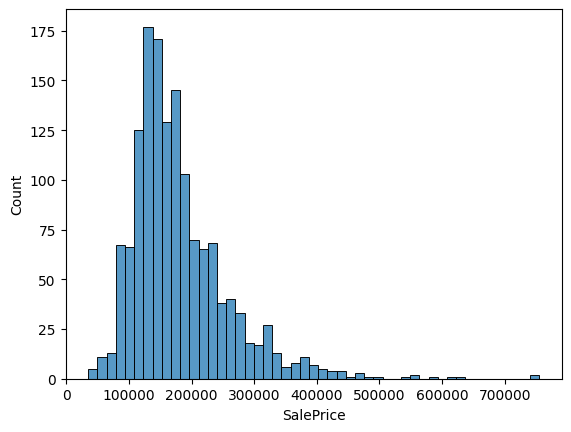

In [3]:
# histogran to evaluate target distribution

sns.histplot(data=data, x='SalePrice')
plt.show()

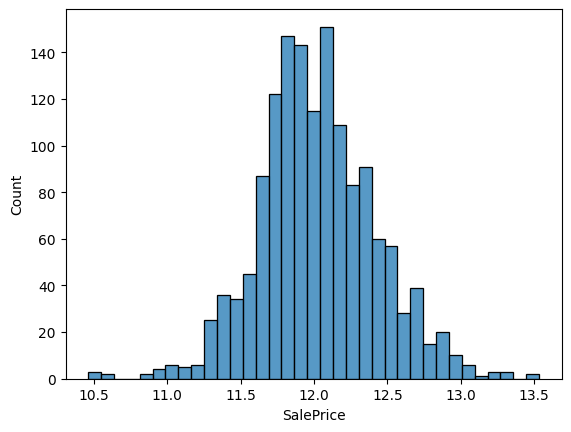

In [4]:
# fetaure engineering: transformation with LOG

sns.histplot(data=np.log(data['SalePrice']))
plt.show()

We can see that logarithm transformation affect the distribution into normal

## Feature Selection: Missing Values

In [5]:
missing(data)

,missing,percent_missing,types,n_unique
PoolQC,1453,99.52,object,3
MiscFeature,1406,96.30,object,4
Alley,1369,93.77,object,2
Fence,1179,80.75,object,4
MasVnrType,872,59.73,object,3
...,...,...,...,...
MoSold,0,0.00,int64,12
YrSold,0,0.00,int64,5
SaleType,0,0.00,object,9
SaleCondition,0,0.00,object,6


In [6]:
# Making variabels that includes missing values within more than 50%

var_drop = [var for var in data.columns if data[var].isnull().sum() > 0.5*data.shape[0]]
var_drop

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
# Drop those variabels
data = data.drop(var_drop, axis=1)

In [8]:
data.shape[1]

76

In [9]:
data = data.drop(['Id'], axis=1)

In [10]:
# data['MasVnrType']
data.shape

(1460, 75)

## Missing Values Analysis

In [11]:
# split variables categorical dan numerical

cat_vars = [var for var in data.columns if data[var].dtype == 'O'] # O = object data type

# MSsubClass is categorical variable if we see the data desciption, put in cat_vars
cat_vars = cat_vars + ['MSSubClass']


num_vars = [var for var in data.columns if var not in cat_vars and var != 'SalePrice']

In [12]:
# making new list that include variable with NaN for analysis
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

data[vars_with_na].isnull().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [13]:
# split data catgorical and numerical for missing value analysis
cat_na = [var for var in cat_vars if var in vars_with_na] # categorical variable with na
num_na = [var for var in num_vars if var in vars_with_na] # numerical variable with na

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  11
Number of numerical variables with na:  3


In [14]:
def analyse_na_value(df, var):
    # backup
    df = df.copy()

    # missing value observarsion with encoding, 1 is missing and 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # create grup by for mean analysis sale price
    tmp = df.groupby(var)['SalePrice'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')

    plt.show()

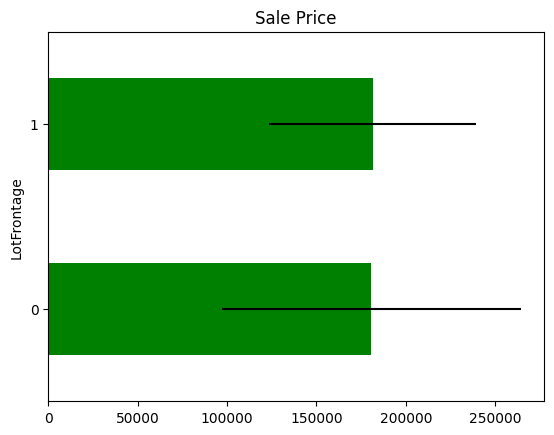

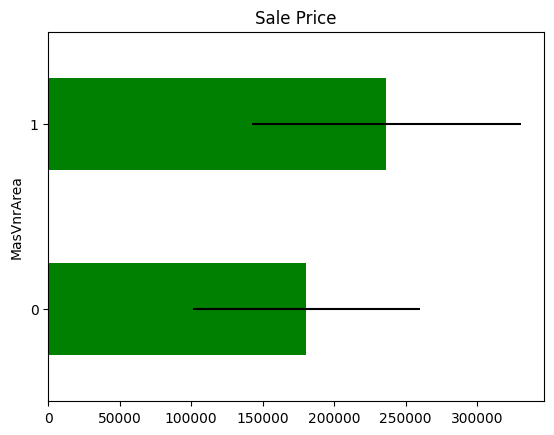

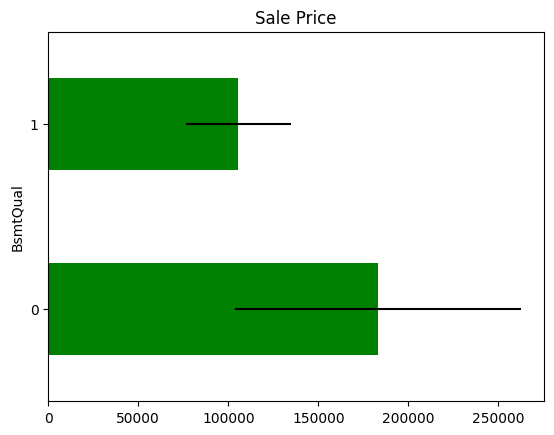

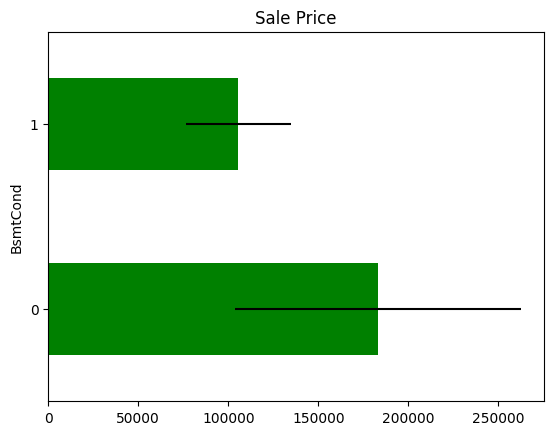

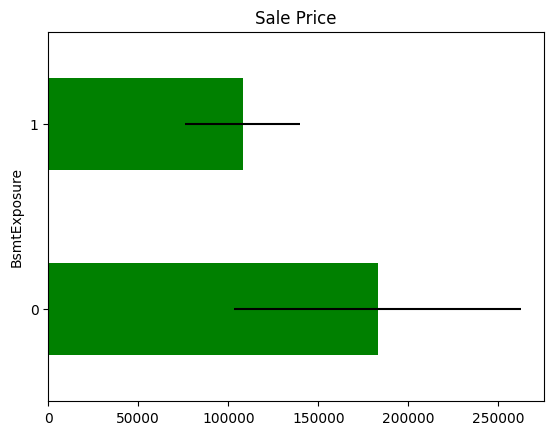

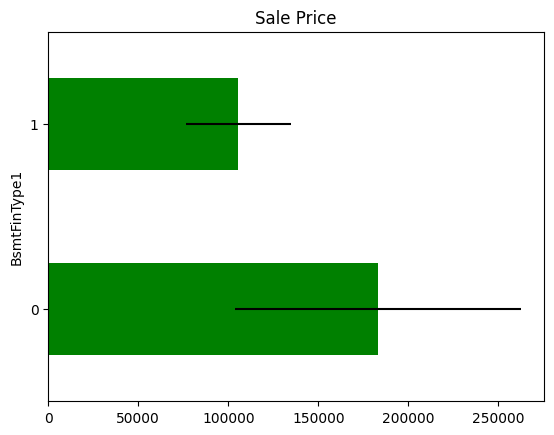

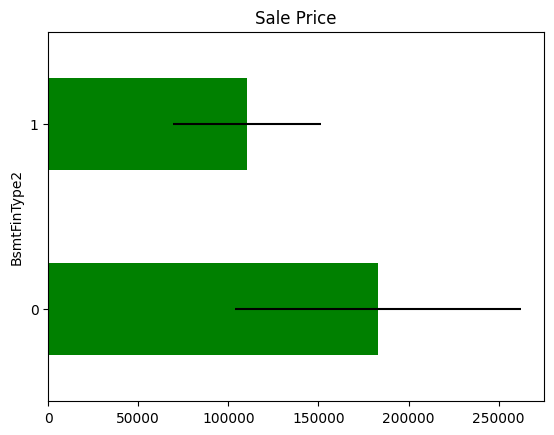

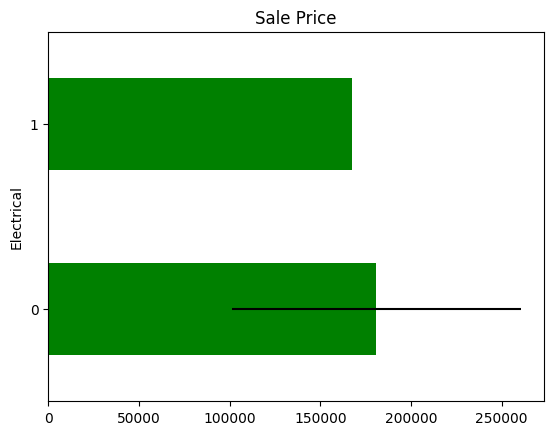

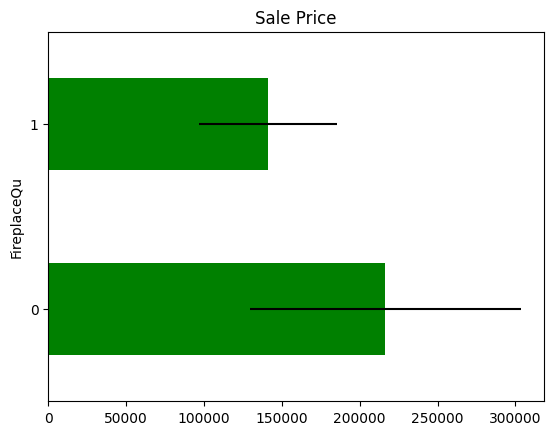

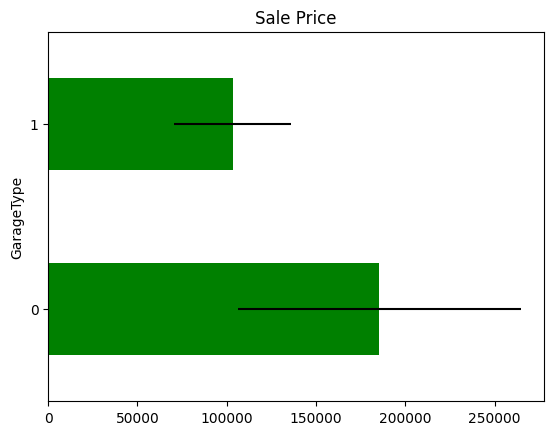

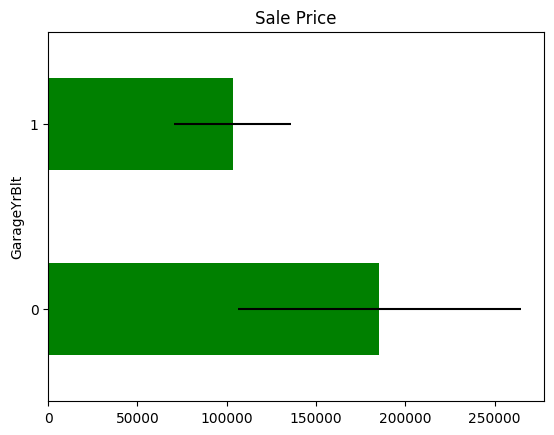

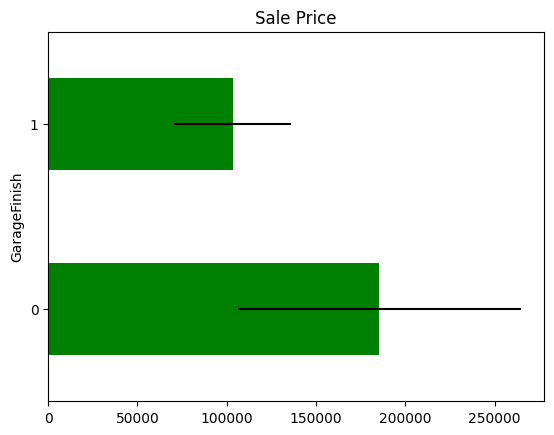

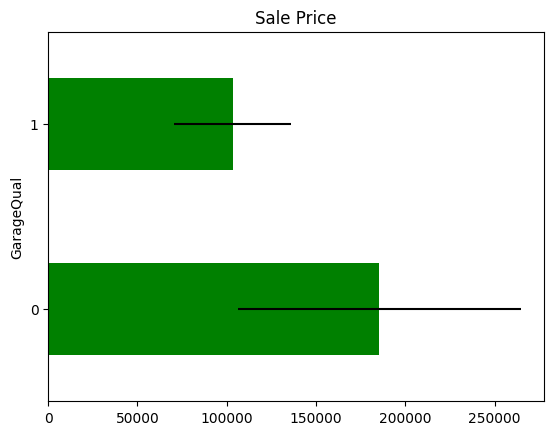

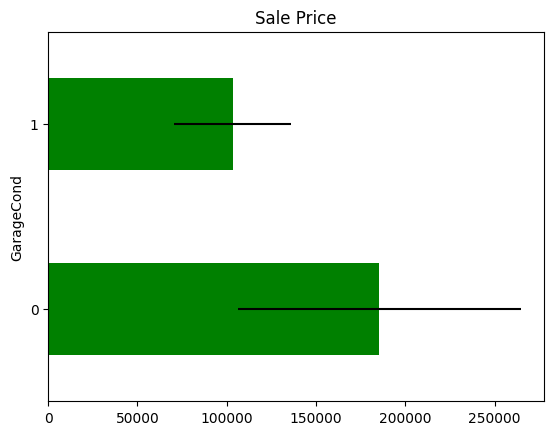

In [15]:
# looping
for var in vars_with_na:
    analyse_na_value(data, var)

We can see that few variables that contain NaN give us an information, this can be seen from the difference in the average. variables other than LotFrontAge are good predictors.

# Features Engineering: Creation
## Temporal Variables

Here we have 4 time variables: <br>

- YearBuilt: year the house was built
- YearRemodAdd: year the house was remodeled
- GarageYrBlt: year the garage was built
- YrSold: year the house was sold

we can extract information from these 4 variables for analysis, such as the age of the house = YrSold - YearBuilt

In [16]:
# list time variable 

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
#eksplore
for var in year_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

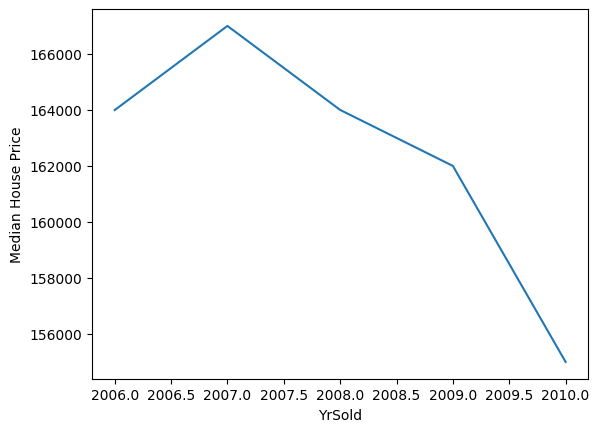

In [18]:
#plot median saleprice

data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show()

There is something odd about the sales price, where the house price is decreasing over time, of course this is not normal, we need further analysis to determine why this could happen.

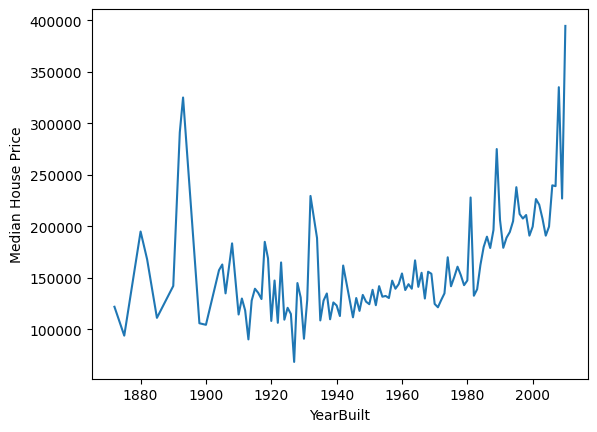

In [19]:
data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.show()

we can see that more younger the house more expensive the price

now let see the if the year variables affect the price of the house

In [20]:
def analyse_year_vars(df, var): # function to analyse year variable
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from ' + var)
    plt.legend()
    plt.show()

In [21]:
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

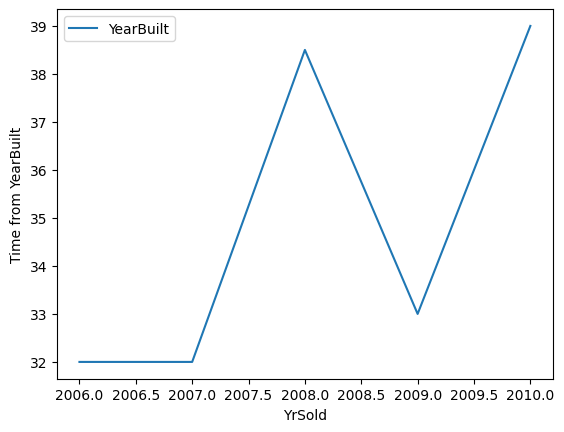

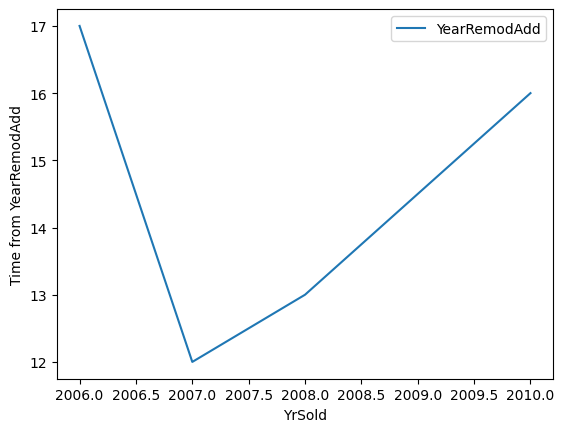

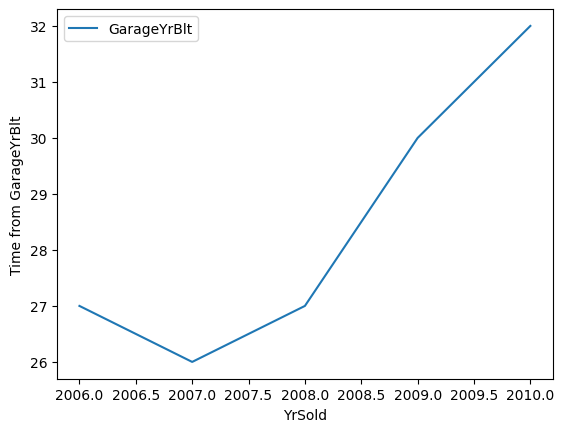

In [22]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

From the plot, it can be seen that the houses that were sold in the last few years have a garage that is older and has not been renovated, which may explain why the sale prices are lower in recent years, at least in this dataset.

Now we can plot time since last renovated, or time since built, and sale price, to see if there is any relationship.

In [23]:
def analyse_year_vars(df, var):
    
    df = df.copy()
    
    df[var] = df['YrSold'] - df[var]
    
    sns.regplot(data=df,x=var, y='SalePrice',
               line_kws={"color":"red"},
               scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()

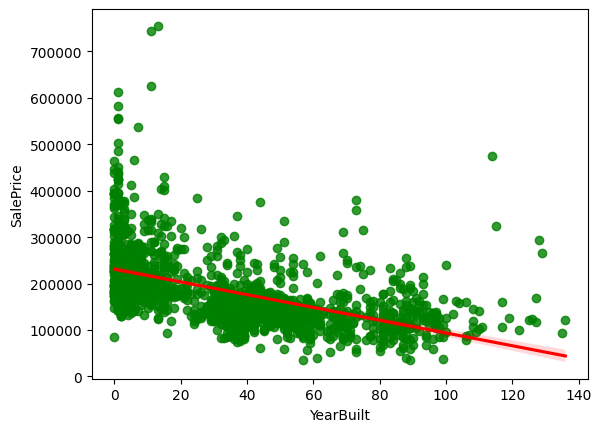

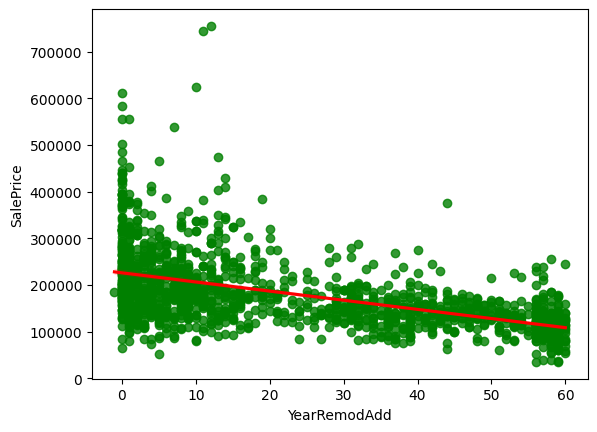

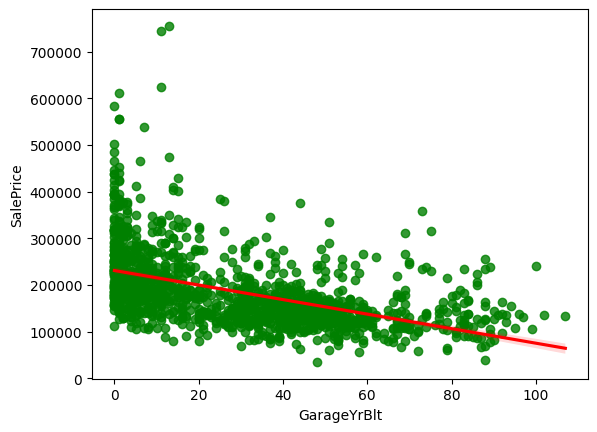

In [24]:
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data, var)

It can be seen that there is a tendency for prices to decrease, with older houses. In other words, the longer the time between the house being built or renovated and the date of sale, the lower the selling price will be. 

which makes sense, because this means the house will look older, and will likely need repairs.

Now let see the Discrete Variables

## Discrete variables

In [25]:
# Making Variable Discrete
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  13


In [26]:
discrete_vars

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold']

This Discrete Variable is tendency to be Qualitative (Qual) or Rating (Cond), or refer to the number of rooms, or units (FullBath, GarageCars), or indicate the size of the space (KitchenAbvGr). 

Ofcourse , it is expected to be higher price, with a larger number.

MoSold is the month in which the house is sold.

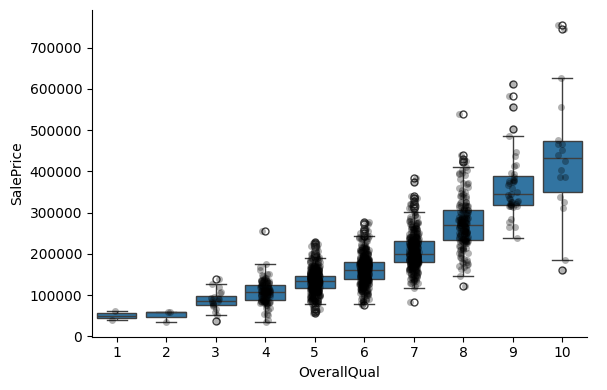

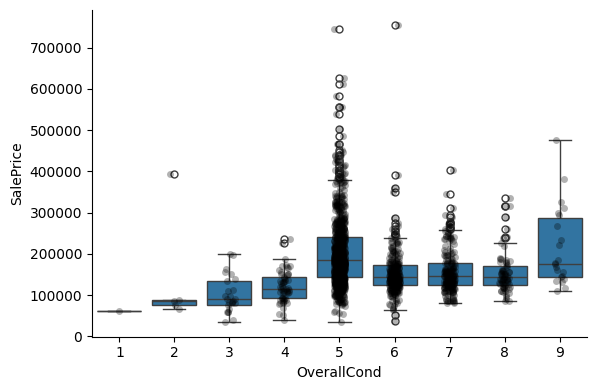

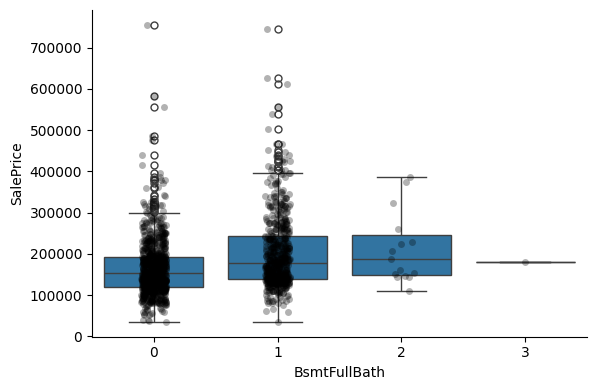

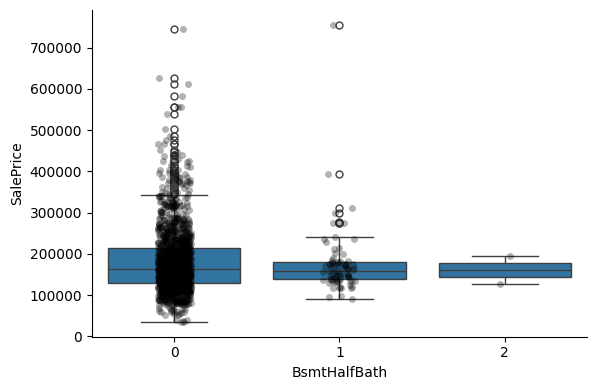

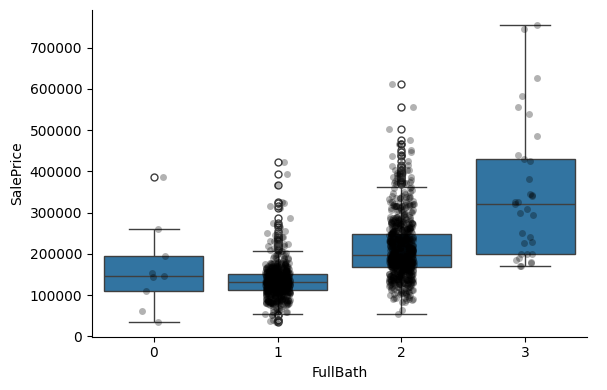

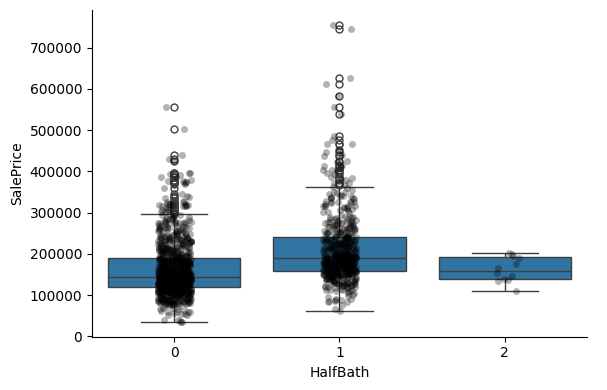

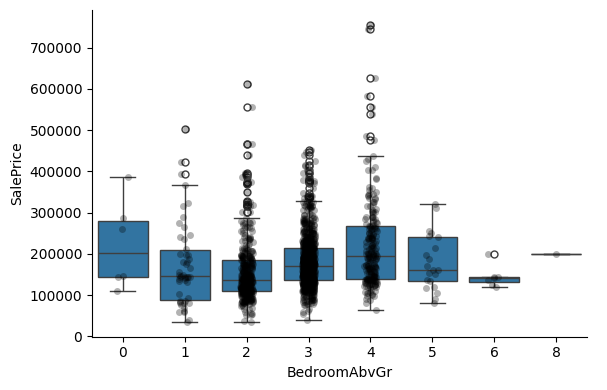

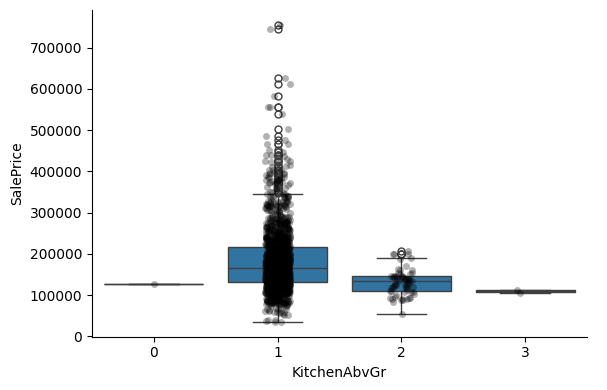

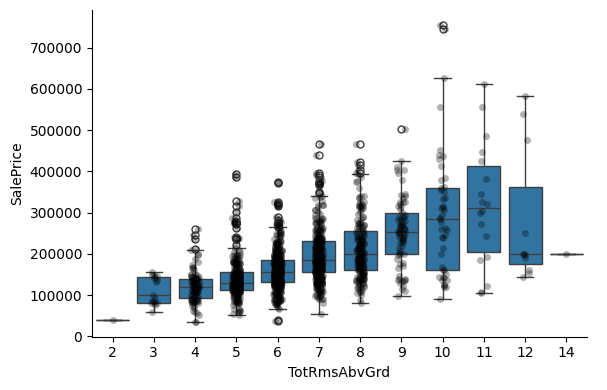

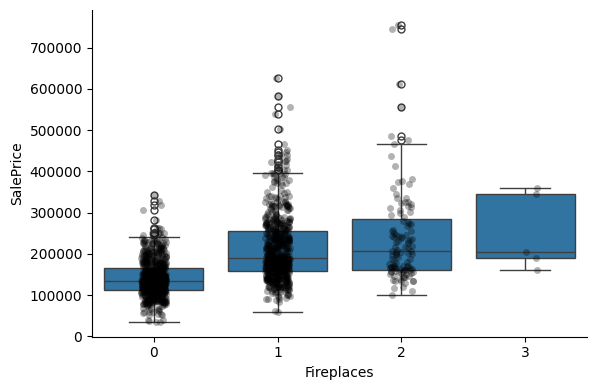

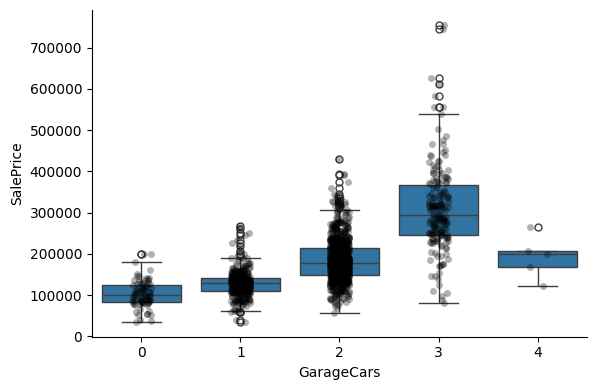

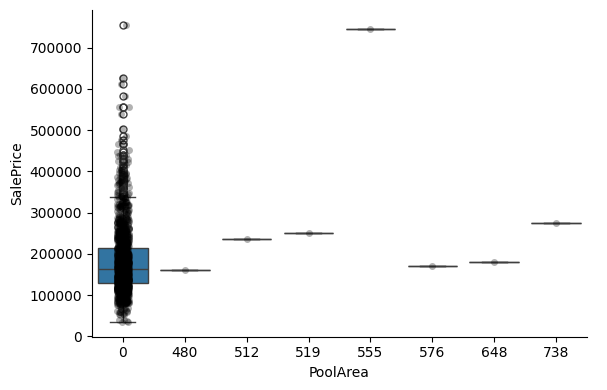

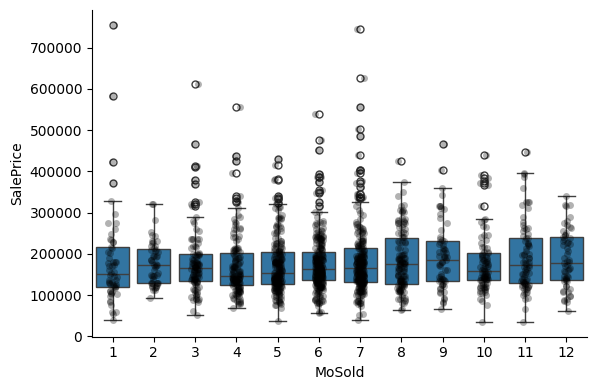

In [27]:
for var in discrete_vars:
    # make boxplot with Catplot (categorical plot)
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

For most of the discrete numerical variables, there appears to be an increase in price, quality, or overall condition, or number of rooms, or surface area.

For some variables, no such trend is visible. It is likely that these variables are not good predictors of price, such as the month of the house was sold, the pool area.

## Continious Variabels

In [28]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  18


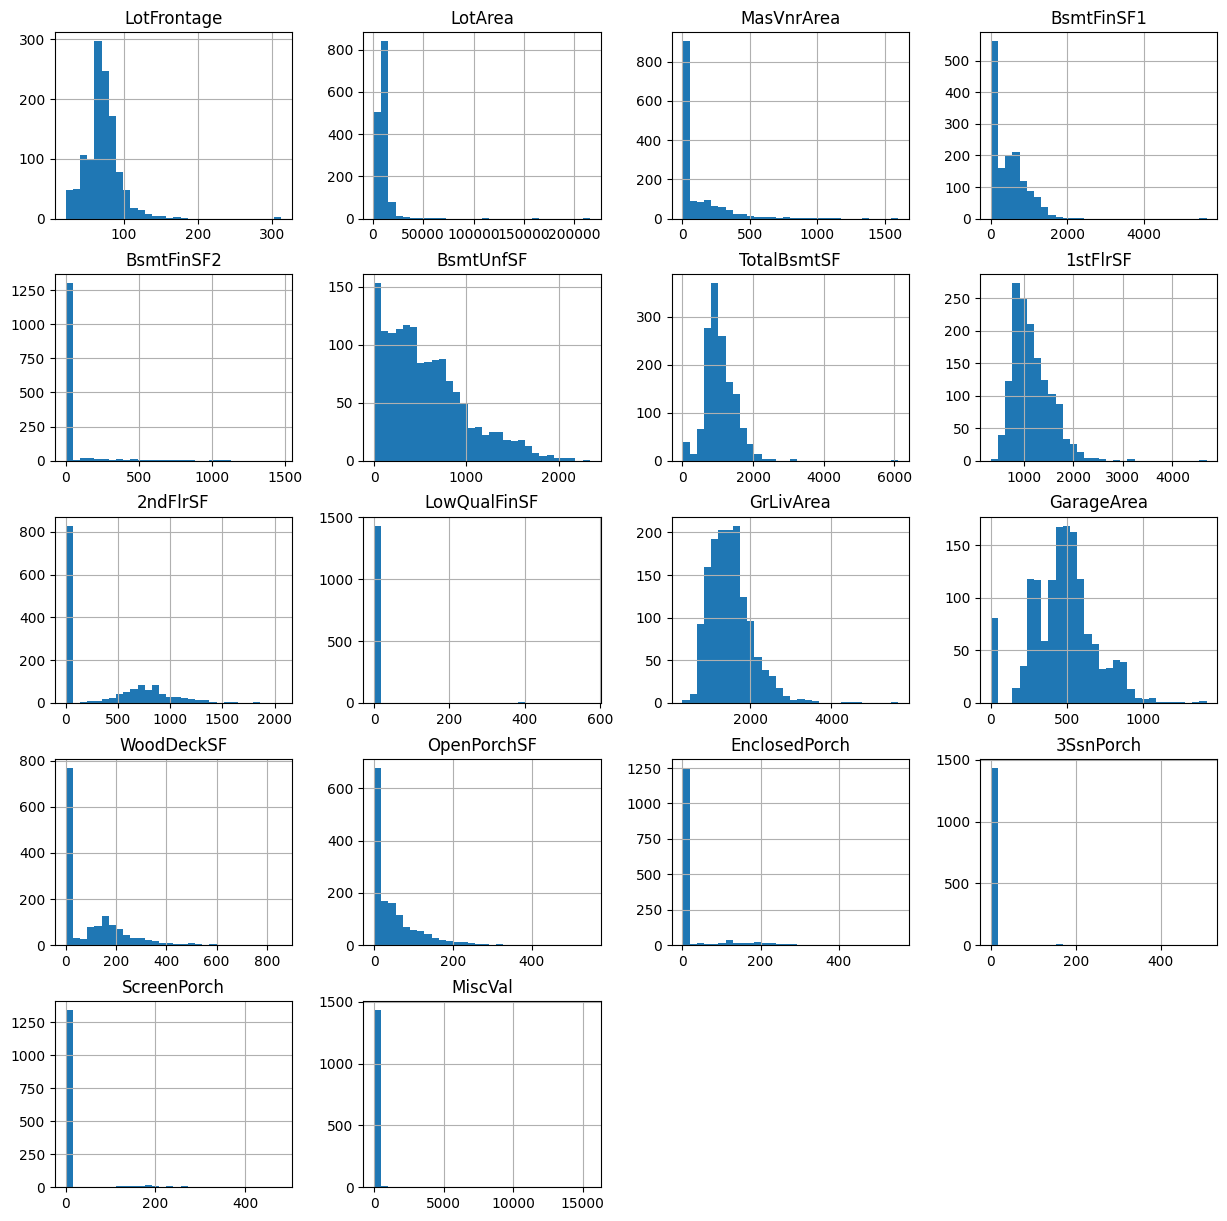

In [29]:
#check the distribution of data

data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

The Variables does not have a normal distribution. And there are some that are very skew like 3SsnPorch, ScreenPorch and MiscVal.

Sometimes, changing the variable to improve the spread of the values, improves the model performance. But it is not possible that the transformation will help to dramatically change the distribution of the super skew variable.

We can apply the Yeo-Johnson transformation to the variables like LotFrontage, LotArea, BsmUnfSF, and the binary transformation to the variables like 3SsnPorch, ScreenPorch, and MiscVal.

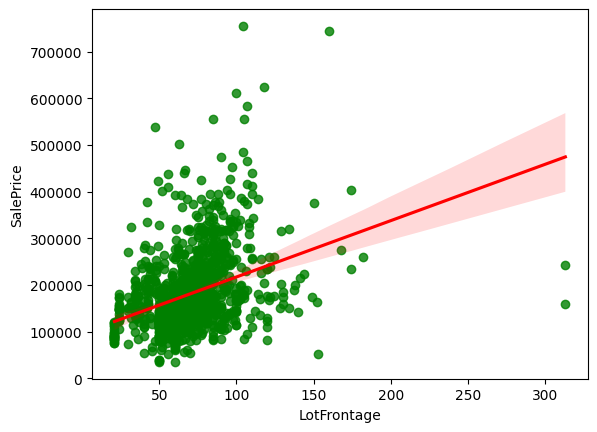

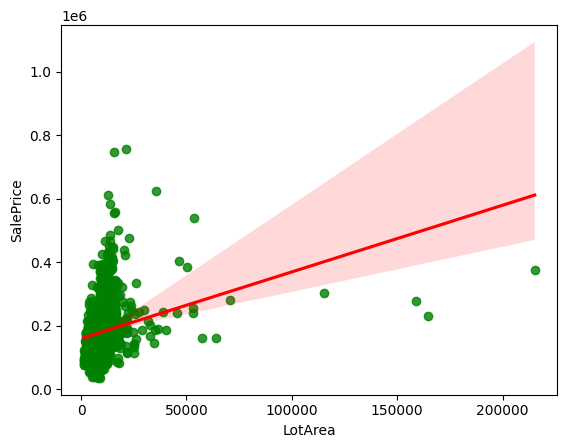

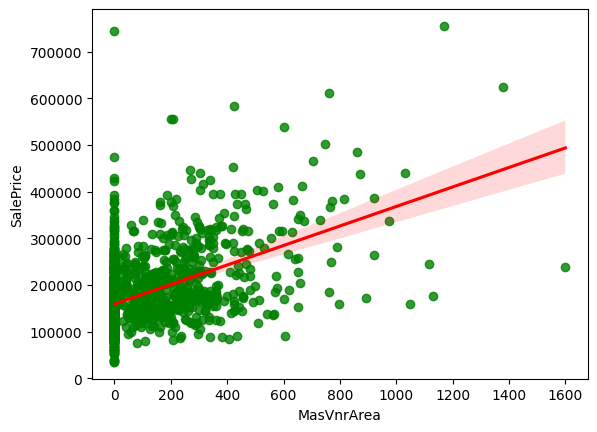

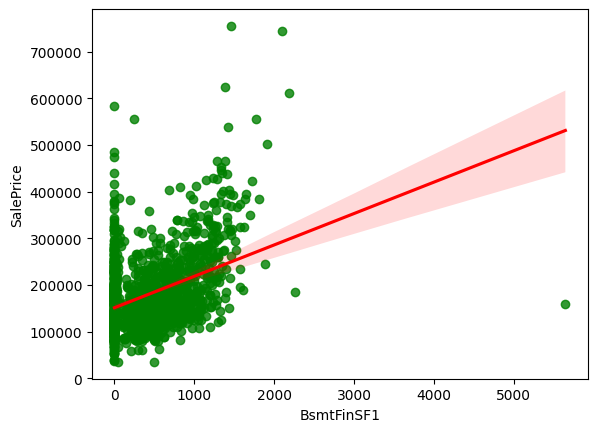

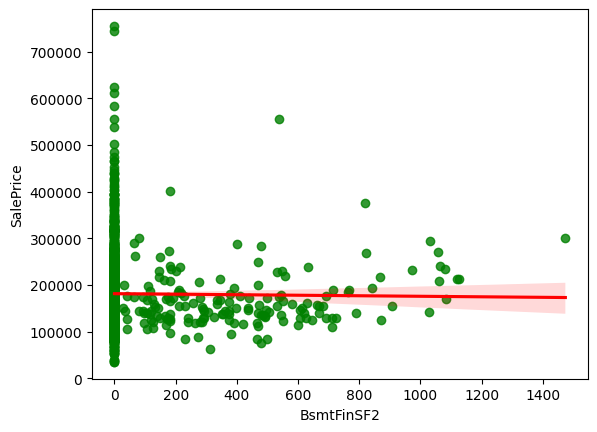

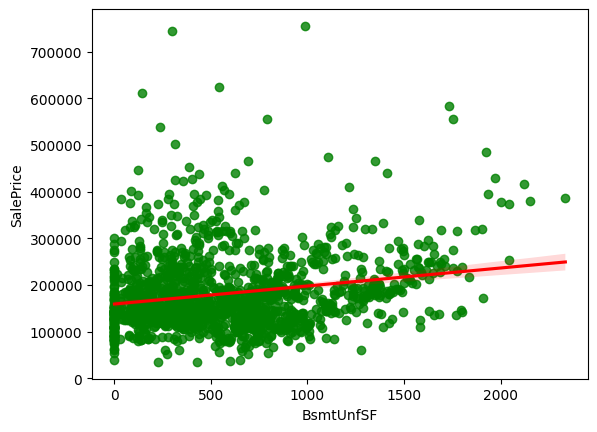

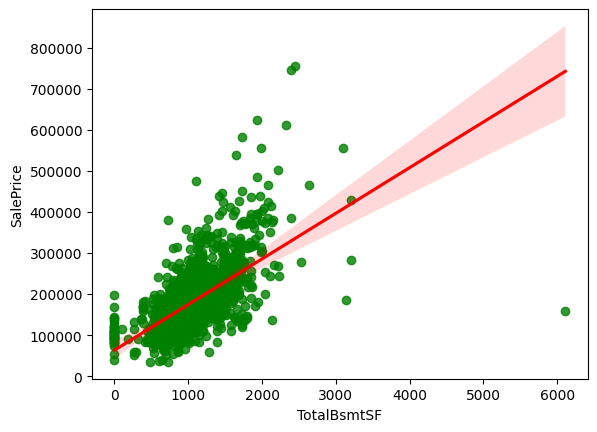

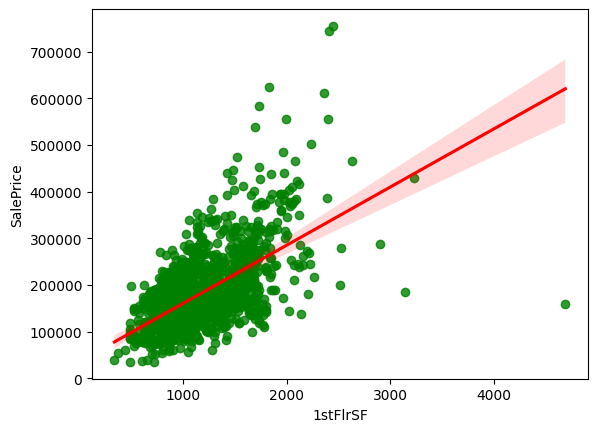

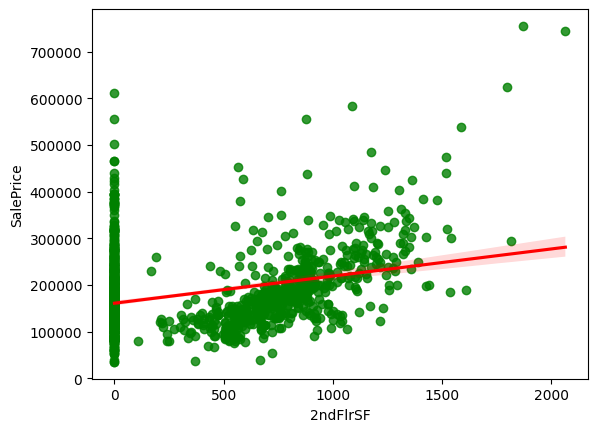

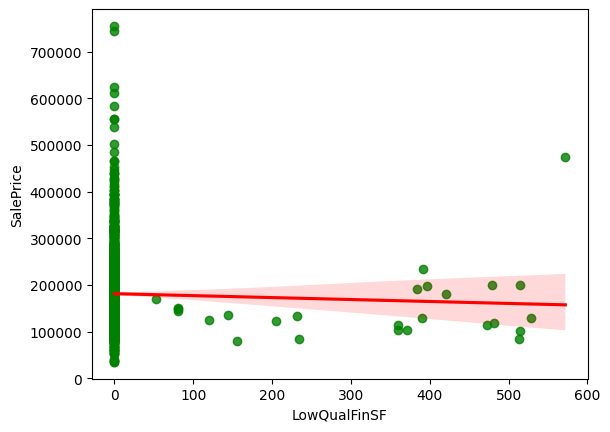

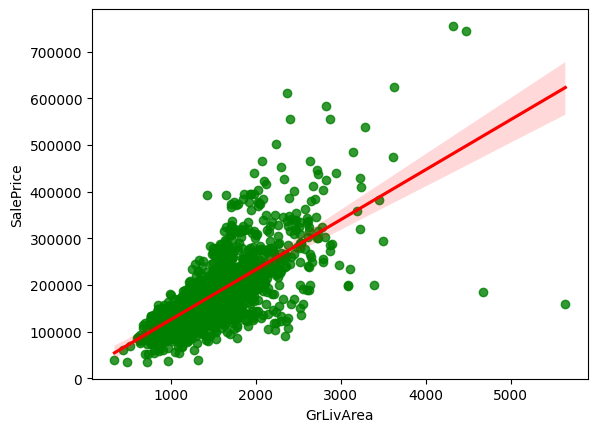

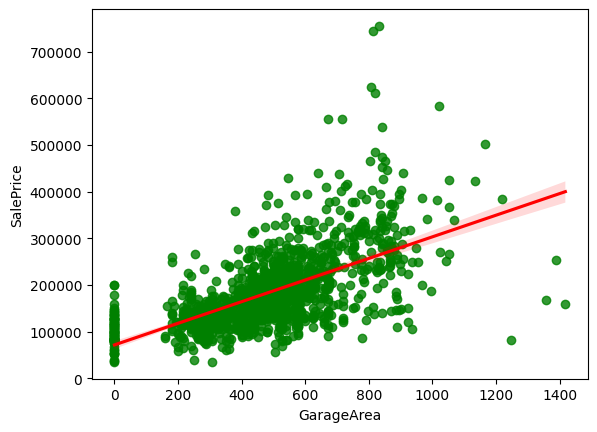

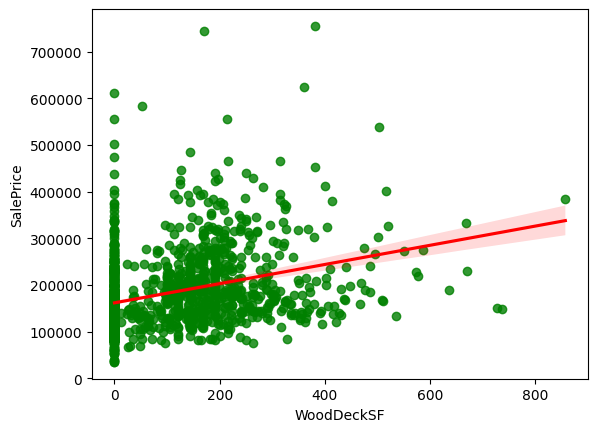

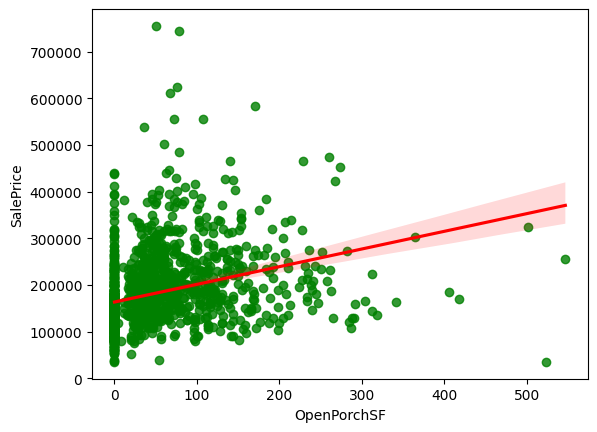

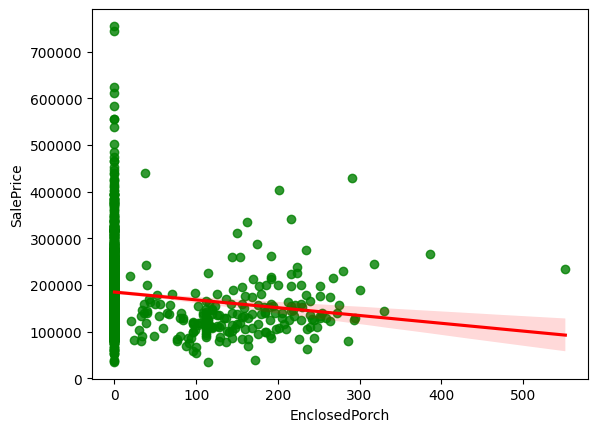

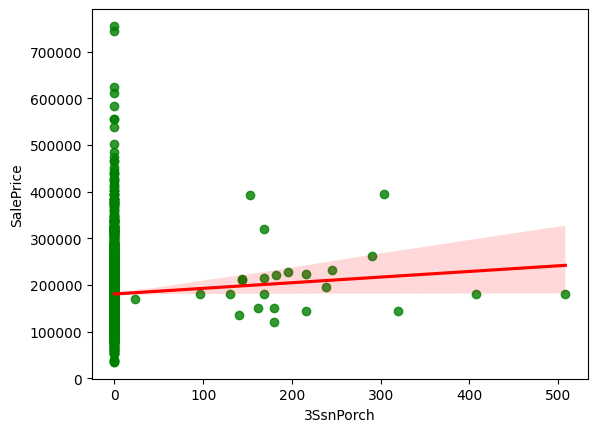

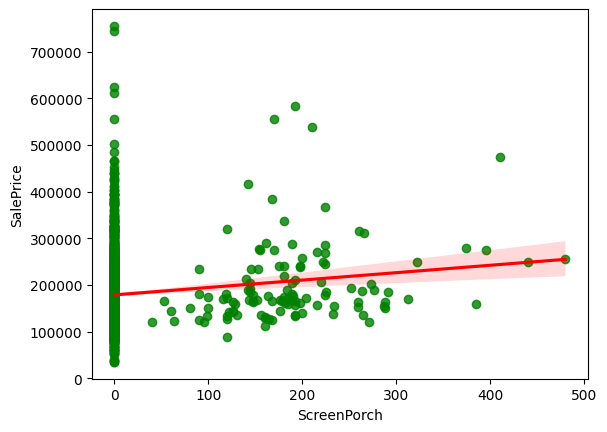

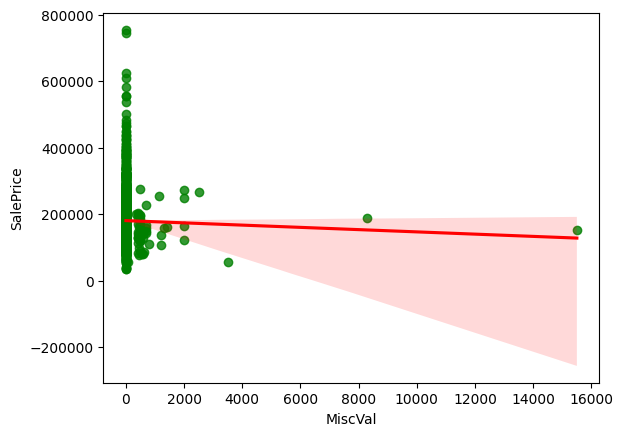

In [30]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=data, x=x, y='SalePrice',
                line_kws={"color":"red"},
                scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(x);


In [31]:
# making list variable skew

skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

# making list variable continuous
cont_vars = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
]

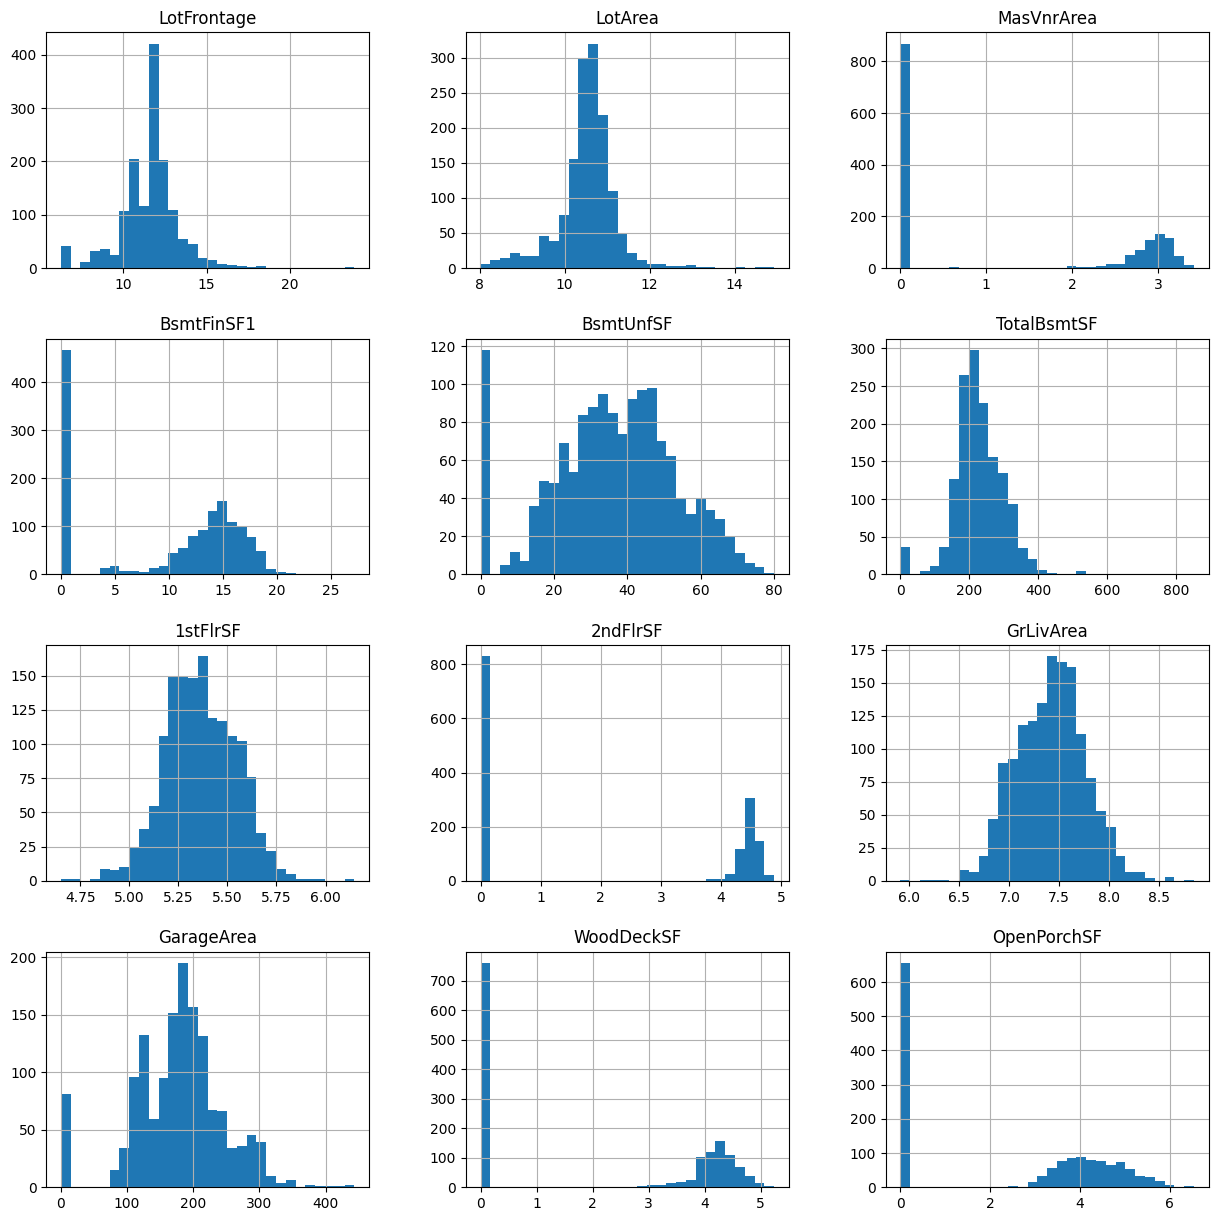

In [32]:
# temporary copy of the data
tmp = data.copy()

for var in cont_vars:
    # Ensure no NaN or infinite values
    if not data[var].replace([np.inf, -np.inf], np.nan).dropna().empty:
        # Fill missing values with the median (or another strategy)
        tmp[var] = data[var].replace([np.inf, -np.inf], np.nan).fillna(data[var].median())
        # Transform the variable - Yeo-Johnson
        tmp[var], param = stats.yeojohnson(tmp[var])
    else:
        print(f"Skipping variable {var} due to insufficient valid data.")
    
# plot the histograms of the transformed variables
tmp[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [33]:
tmp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,11.316795,10.427531,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,2.967318,Gd,TA,PConc,Gd,TA,No,GLQ,15.235367,Unf,0,20.452661,198.284296,GasA,Ex,Y,SBrkr,5.219622,4.527843,0,7.600485,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,204.517946,TA,TA,Y,0.000000,4.227899,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,12.535726,10.596446,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,16.750862,Unf,0,28.330975,264.601146,GasA,Ex,Y,SBrkr,5.442275,0.000000,0,7.284380,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,177.329662,TA,TA,Y,4.594581,0.000000,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11.572628,10.807341,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,2.913979,Gd,TA,PConc,Gd,TA,Mn,GLQ,13.632899,Unf,0,35.046585,209.206787,GasA,Ex,Y,SBrkr,5.261495,4.533734,0,7.645781,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,222.579768,TA,TA,Y,0.000000,3.844769,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,10.874834,10.589520,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,10.593523,Unf,0,39.069650,180.779931,GasA,Gd,Y,SBrkr,5.286701,4.475937,0,7.604740,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,232.664399,TA,TA,Y,0.000000,3.659326,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,12.838021,11.124530,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,3.115499,Gd,TA,PConc,Gd,TA,Av,GLQ,14.902455,Unf,0,37.229495,246.150777,GasA,Ex,Y,SBrkr,5.387108,4.615200,0,7.862156,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,288.452040,TA,TA,Y,4.310040,4.559556,0,0,0,0,0,12,2008,WD,Normal,250000


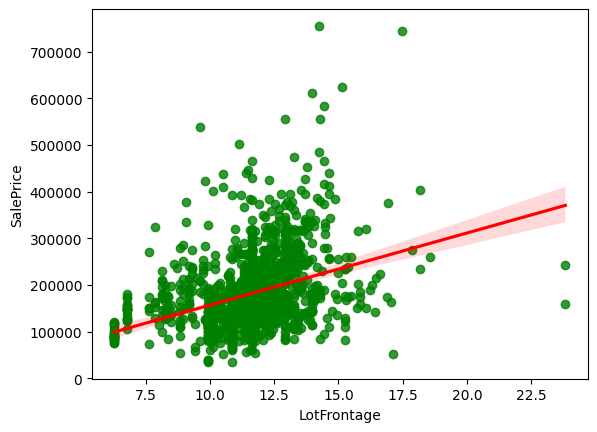

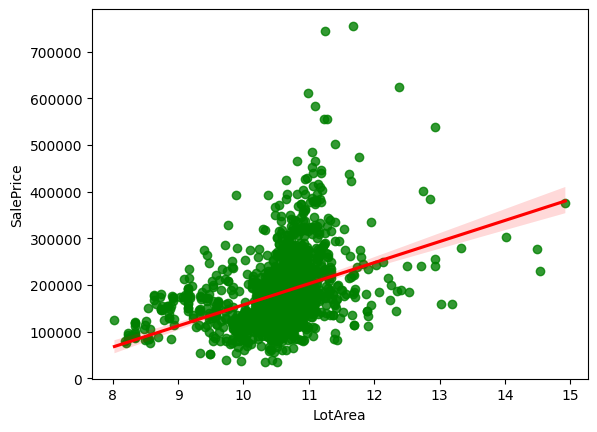

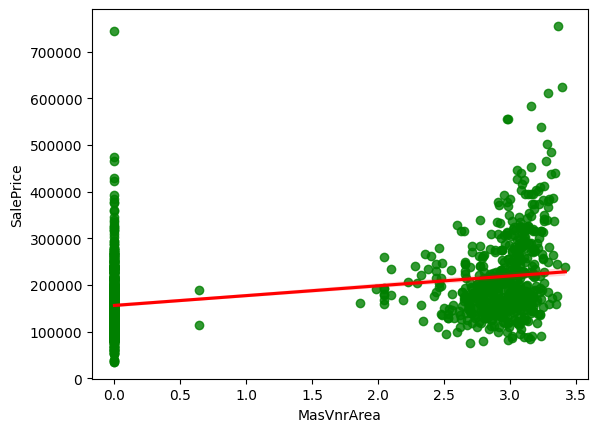

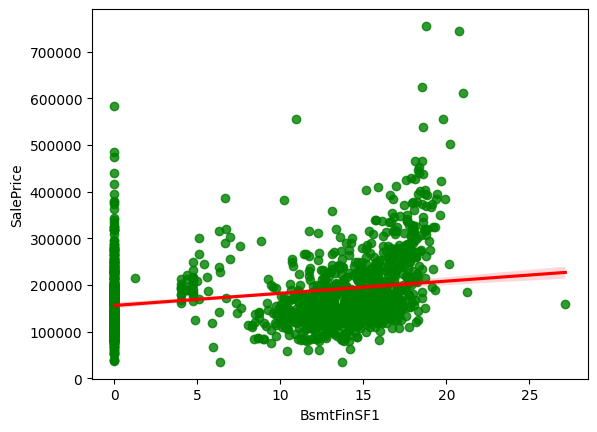

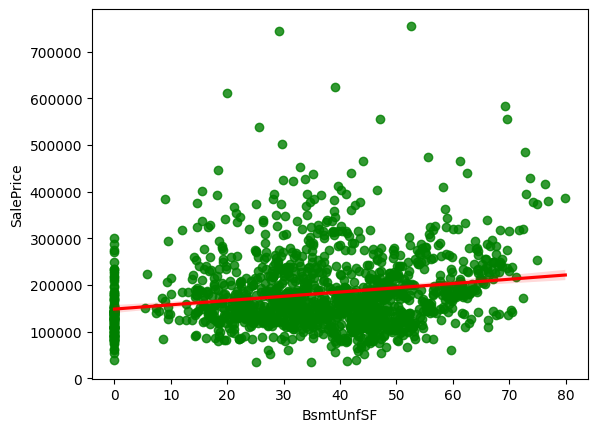

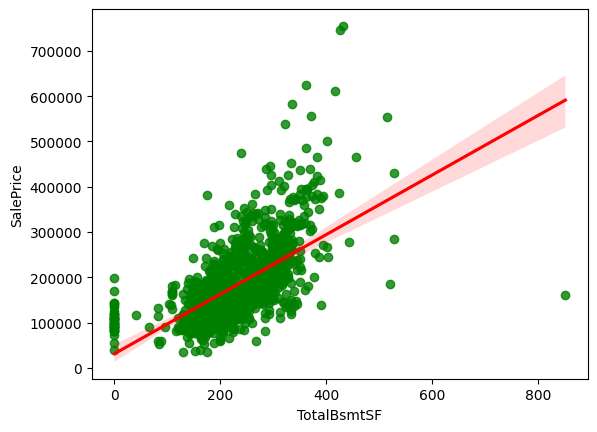

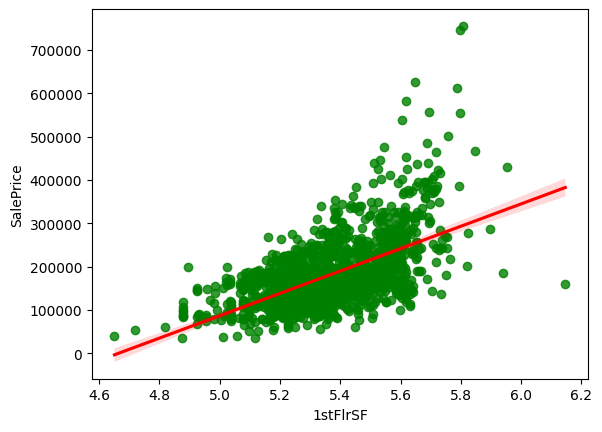

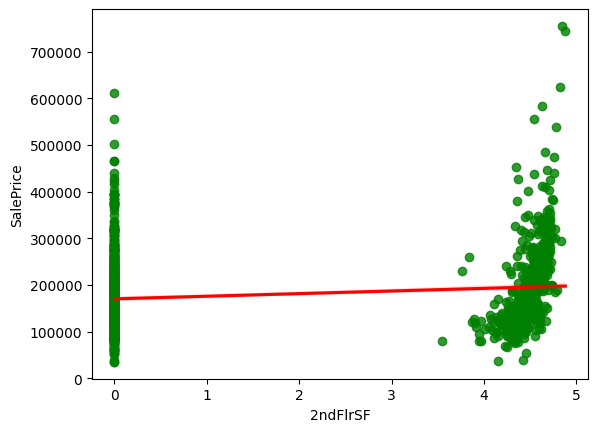

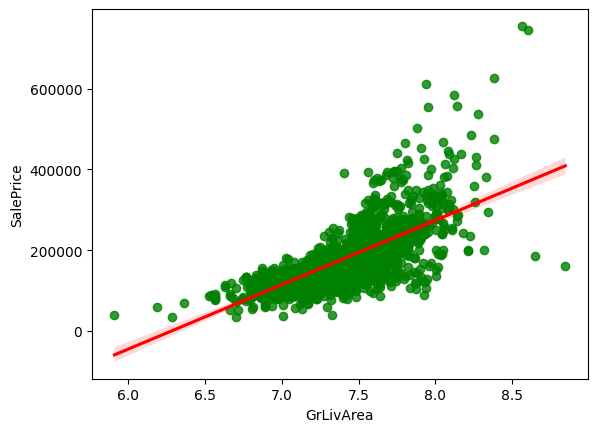

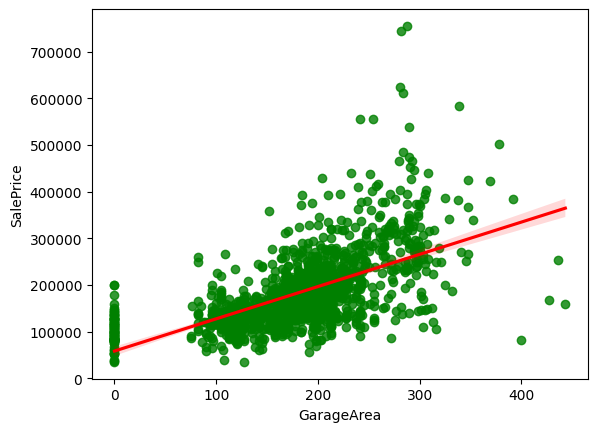

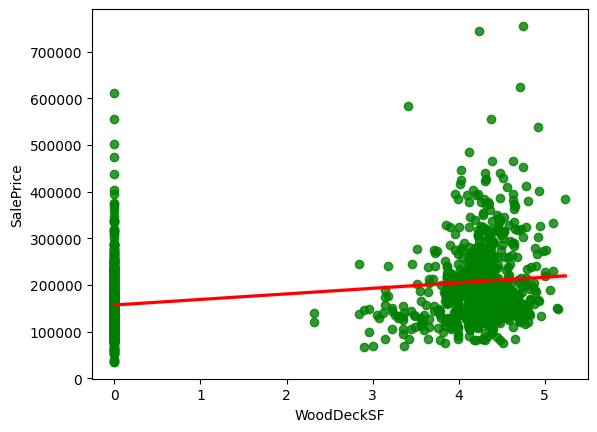

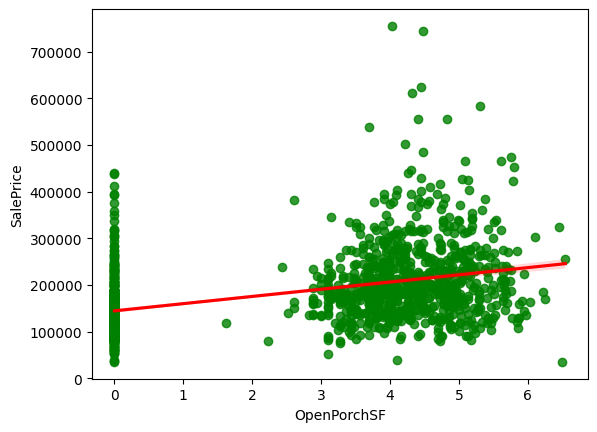

In [34]:
for x in cont_vars:
    plt.figure()
    sns.regplot(data=tmp, x=x, y='SalePrice',
                line_kws={"color":"red"},
                scatter_kws={"color":"g"})
    plt.ylabel('SalePrice')
    plt.xlabel(x);


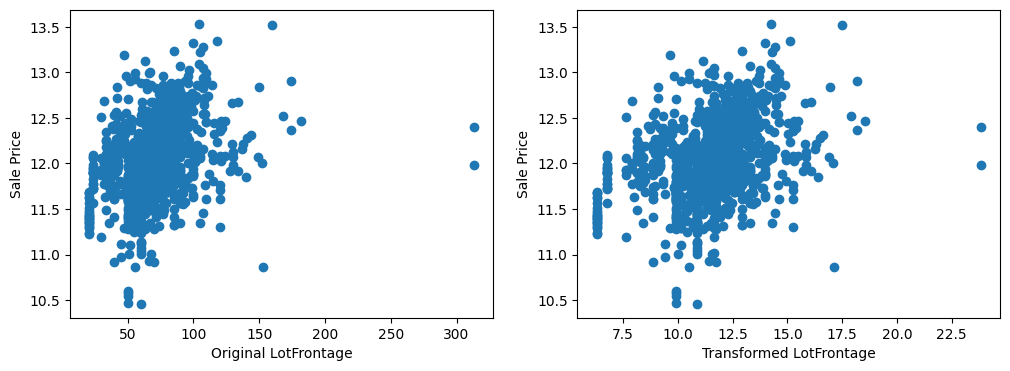

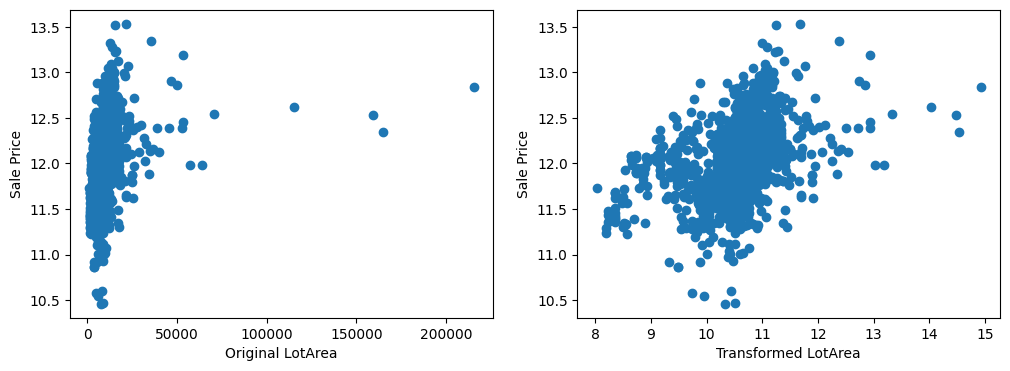

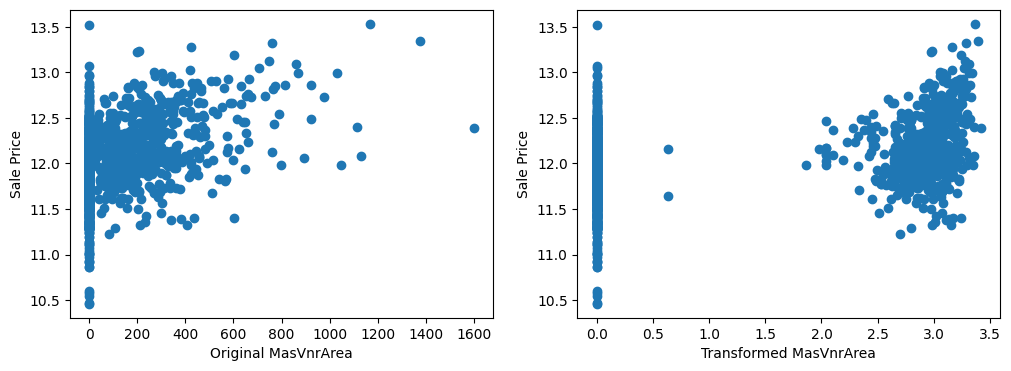

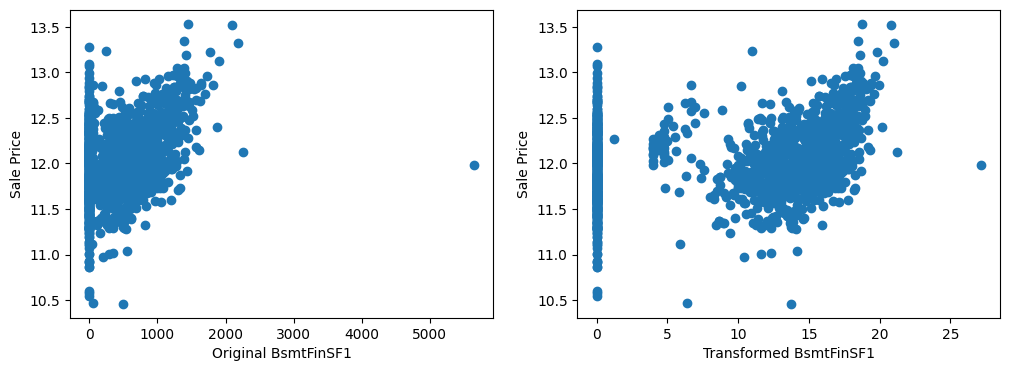

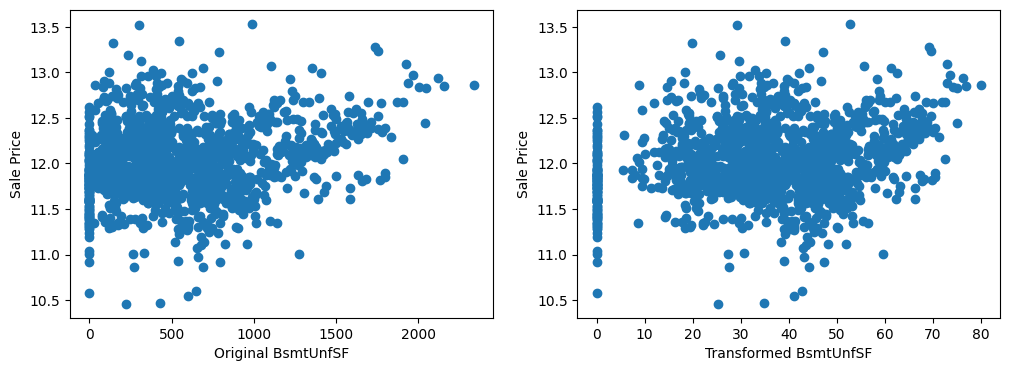

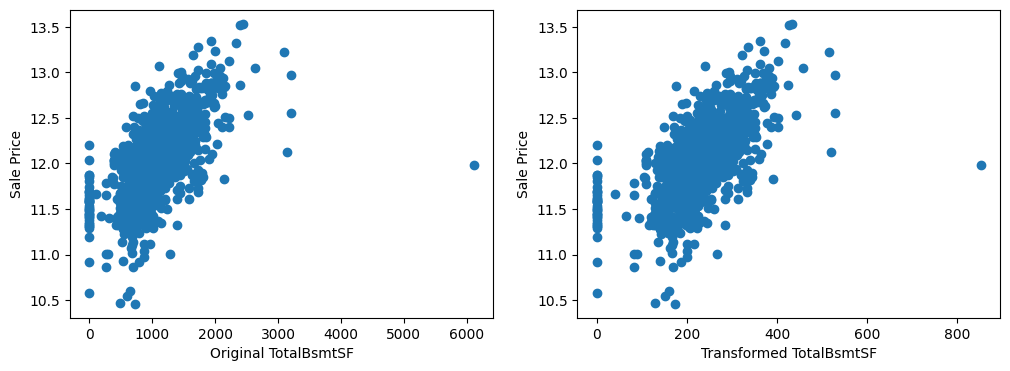

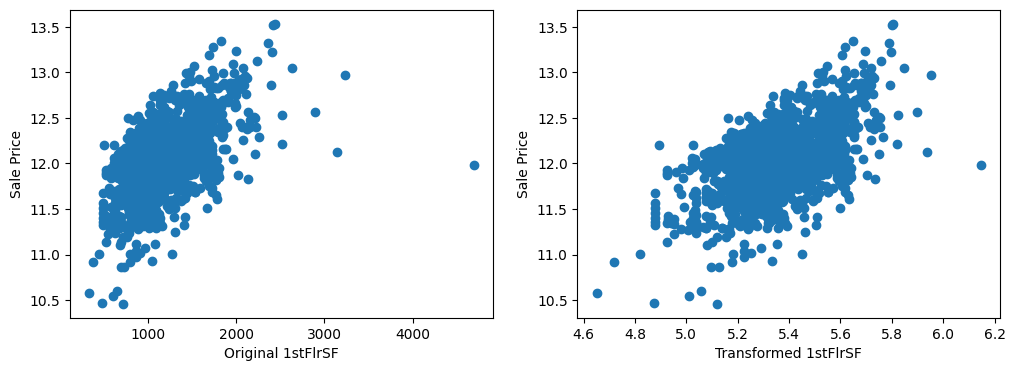

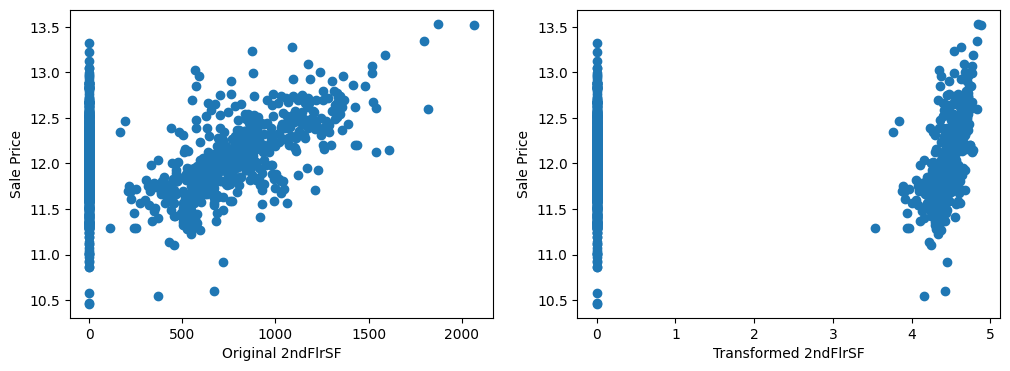

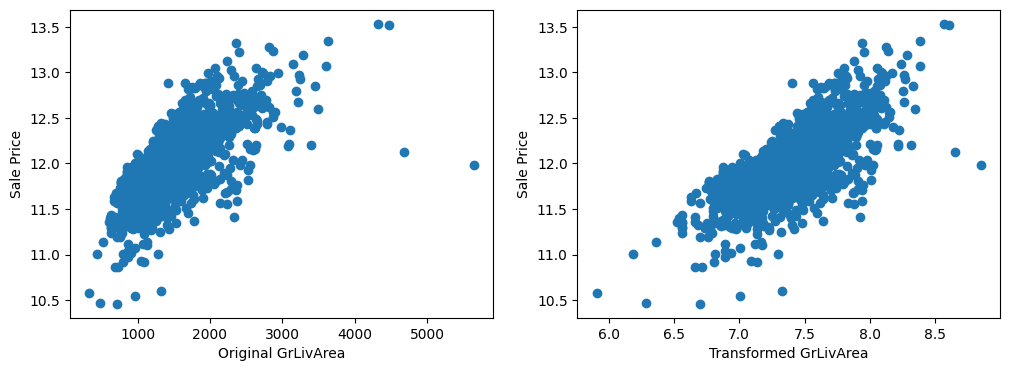

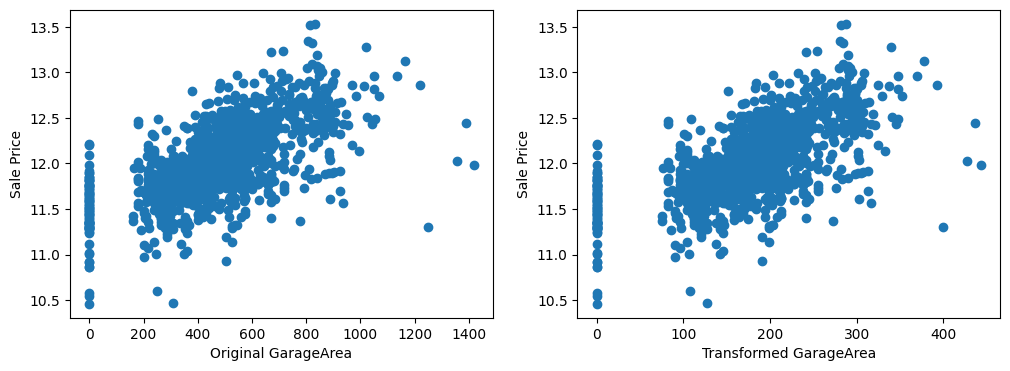

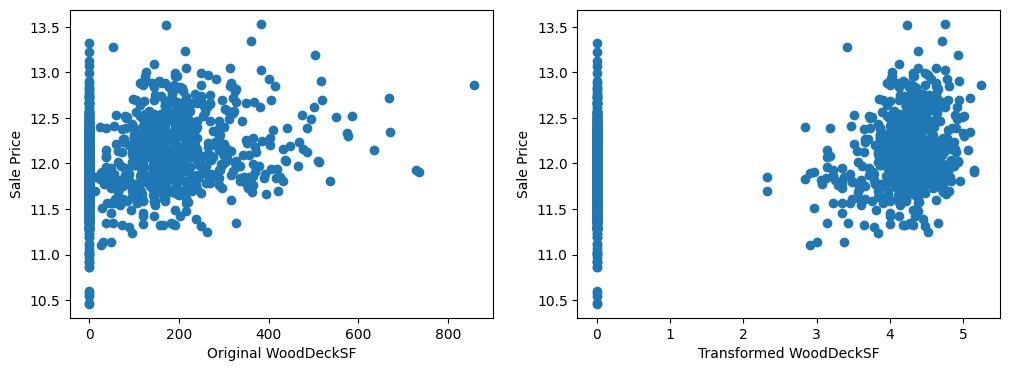

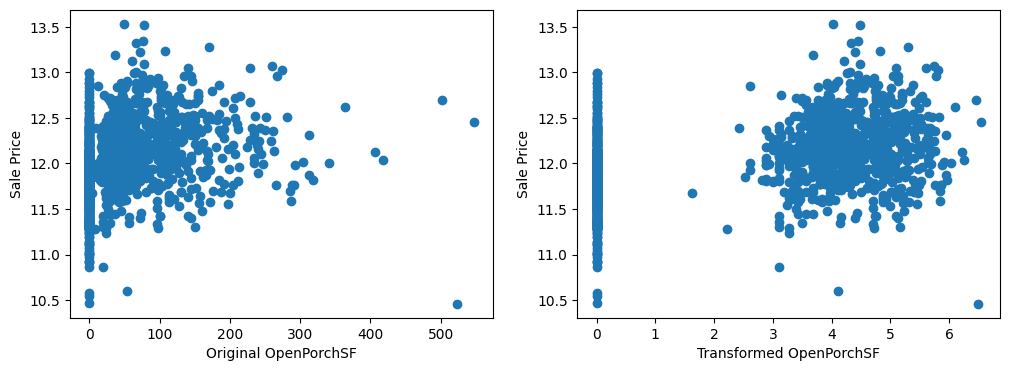

In [35]:
#transform log
for var in cont_vars:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

At first glance, the transformation seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most of the variables have the value 0, so we can't apply a logarithmic transformation, but we can certainly do it for the following variables:

["LotFrontage", "1stFlrSF", "GrLivArea"]

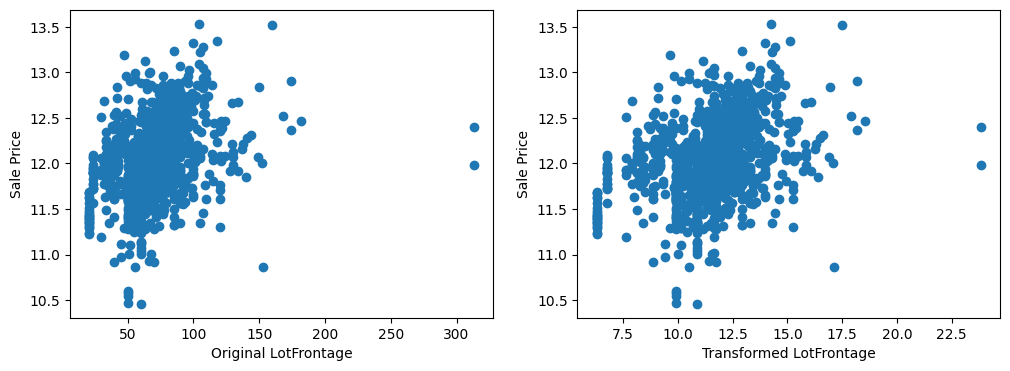

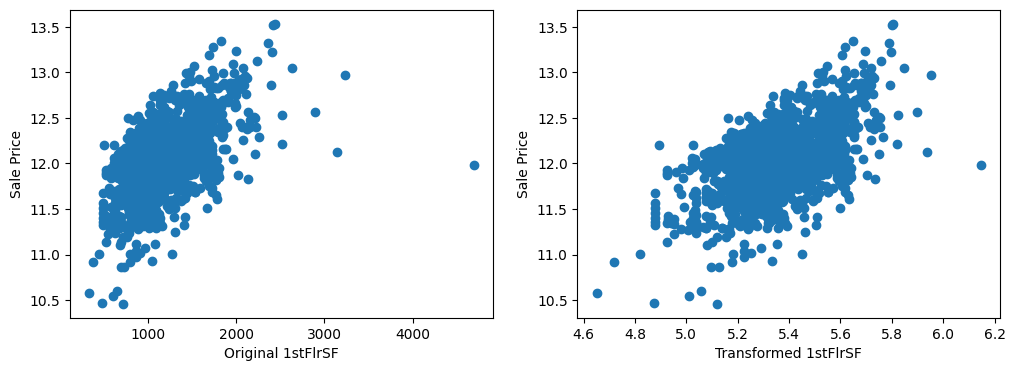

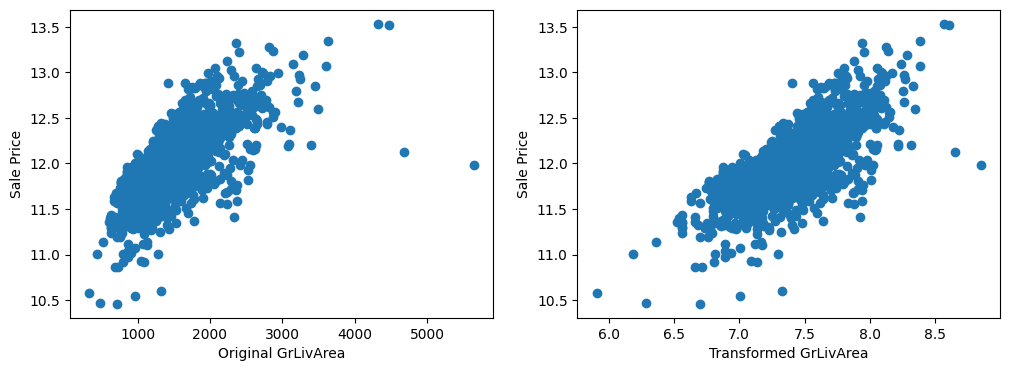

In [36]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    
    plt.figure(figsize=(12,4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(tmp[var], np.log(tmp['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

variable that is changed has a better distribution of values, which in turn can help make better predictions.

# Skew Variables

In [37]:
skewed

['BsmtFinSF2',
 'LowQualFinSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

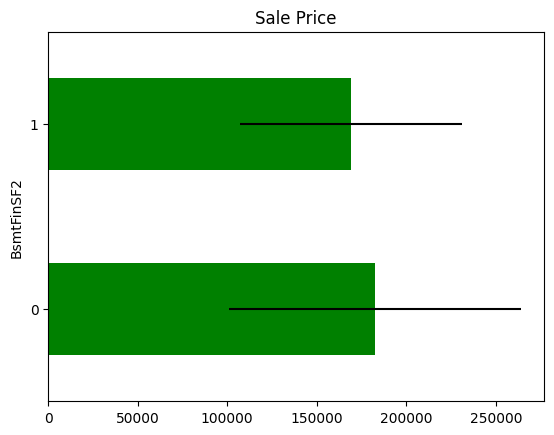

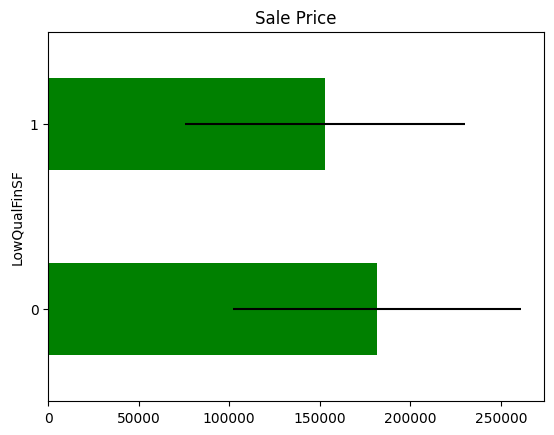

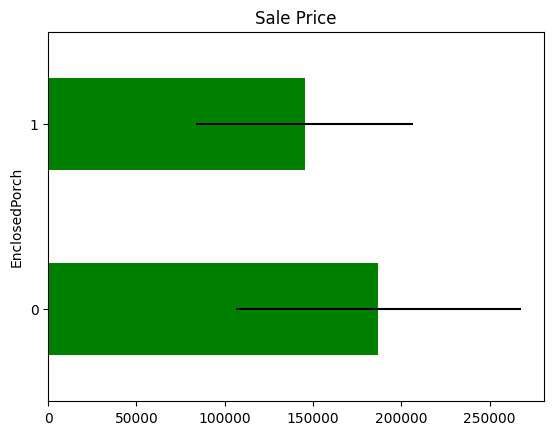

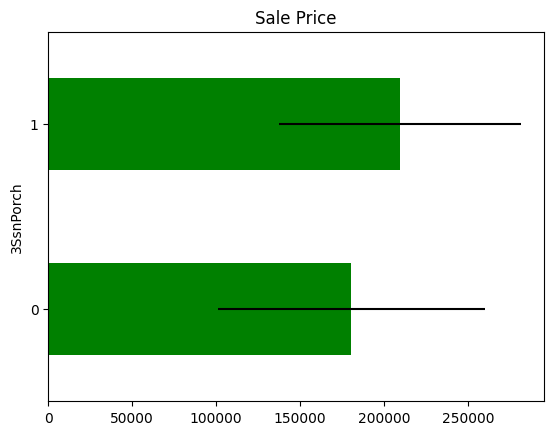

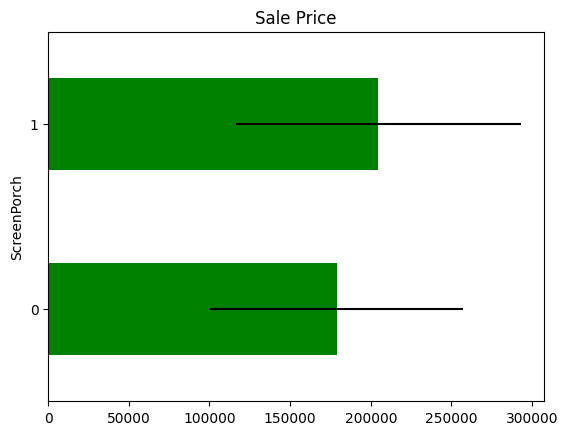

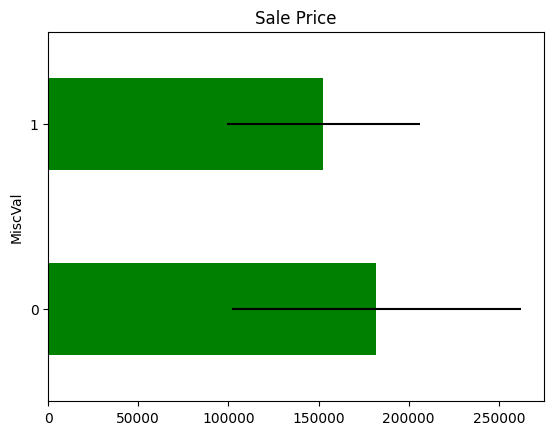

In [38]:
for var in skewed:
    tmp = data.copy()
    # map the variable values into 0 and 1
    tmp[var] = np.where(data[var]==0, 0, 1)
    # determine mean sale price in the mapped values
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Sale Price", color='green')
    plt.show()

It seem there is a difference in Selling Price on the plotted value, but the confidence interval overlap, so it is likely not significant or predictive.

# Categorical Variable

## Number of labels: cardinality

In [42]:
cat_vars = data.select_dtypes(exclude=["float","int"]).columns.tolist()

cat_vars = cat_vars + ['MSSubClass'] # base on  data description , MSSubClass is categorical variable that already encoded
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  39


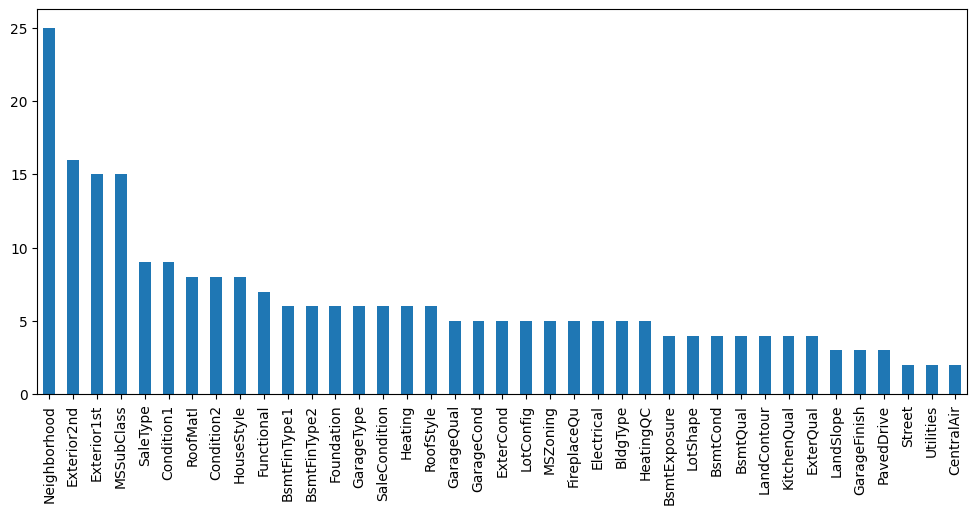

In [41]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))
plt.show()